The `Radiation`class offers a simple interface for creating boxplots to compare different models, observational datasets, and variables.

As an example, we will plot the net long-wave and top net short-wave radiation fluxes at the top of the atmosphere for the IFS-NEMO historical experiment, comparing the results with ERA5 and CERES climatology.

In [1]:
from aqua import Reader
from aqua.graphics import boxplot
from aqua.diagnostics import Boxplots, PlotBoxplots


/work/bb1153/b382321/miniforge3/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
var = ['-tnlwrf', 'tnswrf']
boxplots = Boxplots(model = 'IFS-NEMO', exp ='historical-1990', source = 'lra-r100-monthly', loglevel='DEBUG')
boxplots.retrieve_and_compute_fldmean(var=var)

boxplots_ceres = Boxplots(model = 'CERES', exp ='ebaf-toa41', source = 'monthly', loglevel='DEBUG')
boxplots_ceres.retrieve_and_compute_fldmean(var=var)



2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/b/b382321/.aqua
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Configuration file found in /home/b/b382321/.aqua/config-aqua.yaml
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Catalog found in /home/b/b382321/.aqua/config-aqua.yaml file are ['climatedt-phase1', 'obs']
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-phase1', 'obs']
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-phase1
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Catalog file is /home/b/b382321/.aqua/catalogs/climatedt-phase1/catalog.yaml
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Machine file is /home/b/b382321/.aqua/catalogs/climatedt-phase1/machine.yaml
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to levante
2025-06-21 16:56:46 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to levante


2025-06-21 16:57:00 :: Boxplots :: INFO     -> catalogs: ['climatedt-phase1'], models: ['IFS-NEMO'], experiments: ['historical-1990']
2025-06-21 16:57:00 :: Boxplots :: INFO     -> catalogs: ['obs'], models: ['CERES'], experiments: ['ebaf-toa41']
2025-06-21 16:57:00 :: OutputSaver :: DEBUG    -> Generated filename: boxplots.boxplot.climatedt-phase1.IFS-NEMO.historical-1990.CERES.ebaf-toa41.['-tnlwrf', 'tnswrf']
2025-06-21 16:57:00 :: create_folder :: INFO     -> Folder ./pdf already exists
2025-06-21 16:57:01 :: add_pdf_metadata :: DEBUG    -> Keeping old metadata
2025-06-21 16:57:01 :: OutputSaver :: INFO     -> Saved PDF: ./pdf/boxplots.boxplot.climatedt-phase1.IFS-NEMO.historical-1990.CERES.ebaf-toa41.['-tnlwrf', 'tnswrf'].pdf
2025-06-21 16:57:01 :: Boxplots :: INFO     -> catalogs: ['climatedt-phase1'], models: ['IFS-NEMO'], experiments: ['historical-1990']
2025-06-21 16:57:01 :: Boxplots :: INFO     -> catalogs: ['obs'], models: ['CERES'], experiments: ['ebaf-toa41']
2025-06-21 16

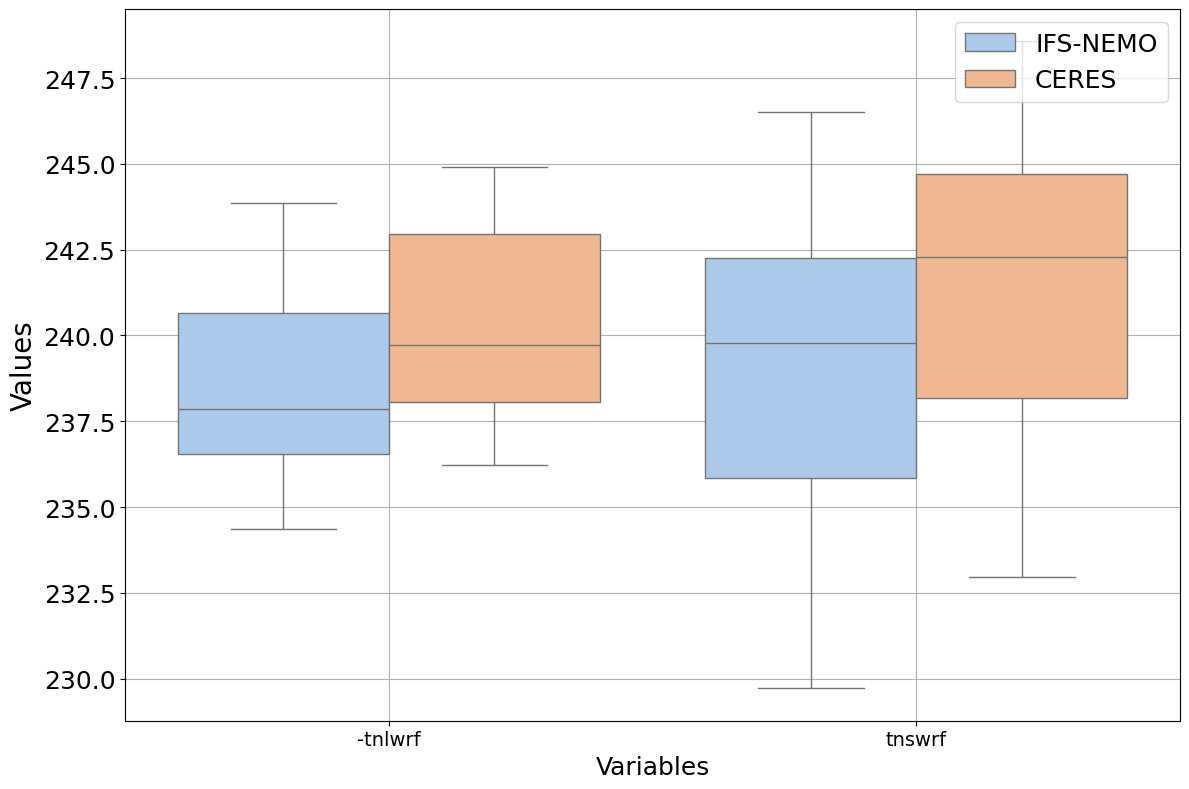

In [3]:
datasets = [boxplots.fldmeans]
datasets_ref = [boxplots_ceres.fldmeans]
variables = ['-tnlwrf', 'tnswrf']

plot = PlotBoxplots(loglevel='DEBUG')
plot.plot_boxplots(data=datasets, data_ref=datasets_ref, var=variables)

In [4]:
boxplots.fldmeans

<xarray.Dataset> Size: 4kB
Dimensions:  (time: 146)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
Data variables:
    tnlwrf   (time) float64 1kB dask.array<chunksize=(12,), meta=np.ndarray>
    tnswrf   (time) float64 1kB dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    catalog:    climatedt-phase1
    model:      IFS-NEMO
    exp:        historical-1990
    startdate:  1990-01-01T00:00:00.000000000
    enddate:    2002-02-01T00:00:00.000000000

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def boxplot_1(fldmeans, model_names, variables, variable_names=None, loglevel='WARNING'):
    """
    Generate a boxplot of precomputed field-mean values for multiple variables and models.

    Args:
        fldmeans (list of xarray.Dataset): Precomputed fldmean() for each model.
        model_names (list of str): Names corresponding to each fldmean dataset.
        variables (list of str): Variable names to be plotted (as in the fldmean Datasets).
        variable_names (list of str, optional): Display names for the variables.
        loglevel (str): Logging level, unused but kept for compatibility.

    Returns:
        tuple: Matplotlib figure and axis.
    """

    sns.set_palette("pastel")
    fontsize = 18

    # Map internal variable names to display names
    label_map = {
        var_name: name for var_name, name in zip(variables, variable_names)
    } if variable_names and len(variable_names) == len(variables) else {var: var for var in variables}

    # Collect data
    boxplot_data = {'Variables': [], 'Values': [], 'Datasets': []}
    for model_ds, model_name in zip(fldmeans, model_names):
        for var_name in variables:
            var = var_name[1:] if var_name.startswith('-') else var_name  # Remove leading '-' if present
            if var not in model_ds:
                continue
            values = model_ds[var].values.flatten()
            if var_name.startswith('-'):
                values = -values
            values = values[np.isfinite(values)]
            boxplot_data['Variables'].extend([label_map[var_name]] * len(values))
            boxplot_data['Values'].extend(values)
            boxplot_data['Datasets'].extend([model_name] * len(values))

    # Build DataFrame
    df = pd.DataFrame(boxplot_data)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(data=df, x='Variables', y='Values', hue='Datasets', ax=ax)

    ax.set_xlabel('Variables', fontsize=fontsize)
    ax.set_ylabel('Values', fontsize=fontsize + 2)
    ax.tick_params(axis='x', labelsize=fontsize - 4)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.legend(loc='upper right', fontsize=fontsize)
    ax.grid(True)
    fig.tight_layout()

    return fig, ax
